#Introduction & Description: Early Stage Diabetes Risk Prediction

###This dataset comprises crucial sign and symptom data of individuals who either exhibit early signs of diabetes or are at risk of developing diabetes.

Attributes Description(17 Coloum):

Age (15 to 65): Age range of the individuals.

Gender (1.Male, 2.Female): Gender information.

Polyuria (1.Yes, 2.No): Presence of excessive urination.

Polydipsia (1. Yes, 2. No): Excessive thirst.

Sudden Weight Loss (1. Yes, 2. No): sudden weight loss.

Weakness (1. Yes, 2. No): Generalized weakness.

Polyphagia (1. Yes, 2. No): Excessive hunger.

Genital Thrush (1.Yes, 2.No): Presence of genital thrush.

Visual Blurring (1. Yes, 2. No): Blurring of vision.

Itching (1. Yes, 2. No): Presence of itching.

Irritability (1. Yes, 2. No): Display of irritability.

Delayed Healing (1. Yes, 2. No): Delayed wound healing.

Partial Paresis(1.Yes,2.No): Partial loss of voluntary movement.

Muscle Stiffness (1. Yes, 2. No): Presence of muscle stiffness.

Alopecia (1. Yes, 2. No): Hair loss.

Obesity (1. Yes, 2. No): Presence of obesity.

Class (1. Positive, 2. Negative): Diabetes classification.

In [ ]:
pip install pgmpy

In [ ]:
pip install pandas networkx matplotlib pgmpy

In [4]:
pip install graphviz

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.preprocessing import LabelEncoder
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph
from pgmpy.inference import VariableElimination
from pgmpy.estimators import ParameterEstimator
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianModel
from pgmpy.models import BayesianNetwork
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, KFold
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from scipy.stats import f_oneway



In [7]:
# Loading a Dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,30.0,Female,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes,No,No,No,No,Positive
1,53.0,Female,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Positive
2,50.0,Female,Yes,Yes,Yes,No,Yes,No,No,No,No,Yes,Yes,No,No,No,Positive
3,40.0,Female,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive
4,35.0,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,No,No,Positive


In [8]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)

Female    220
Male      220
Name: Gender, dtype: int64


In [9]:
#Data analysis
df.describe()

,Age
count,439.000000
mean,46.760820
std,12.681728
min,15.000000
25%,37.000000
50%,47.000000
75%,55.000000
max,90.000000


Data Visualization 


<Axes: xlabel='Gender', ylabel='count'>

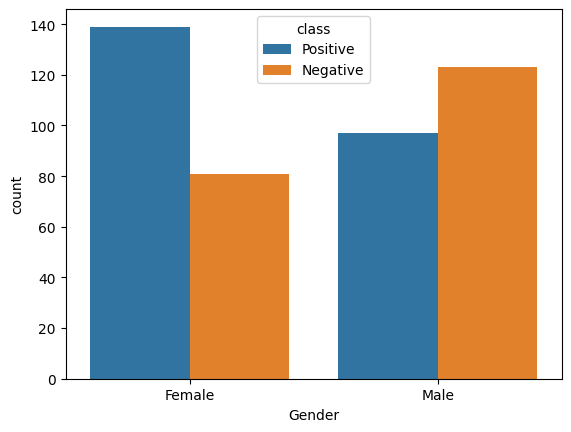

In [10]:
# data visualization
print('Data Visualization ')
sns.countplot(df , x='Gender' , hue="class")  #show the counts of observations in each category

<Axes: xlabel='Gender', ylabel='count'>

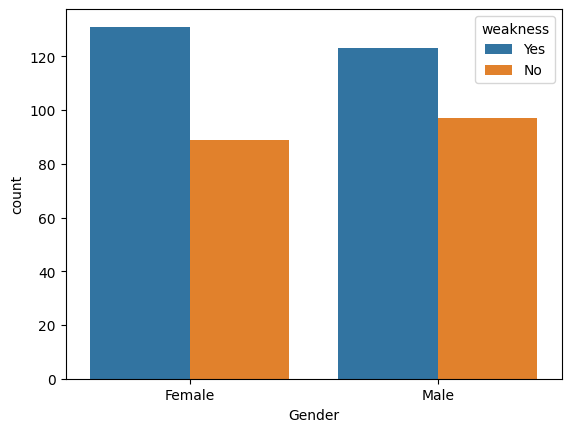

In [11]:
sns.countplot(df , x='Gender' , hue="weakness" )

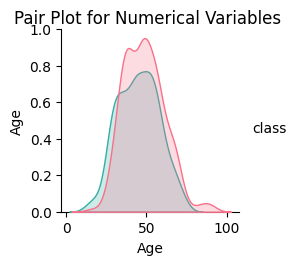

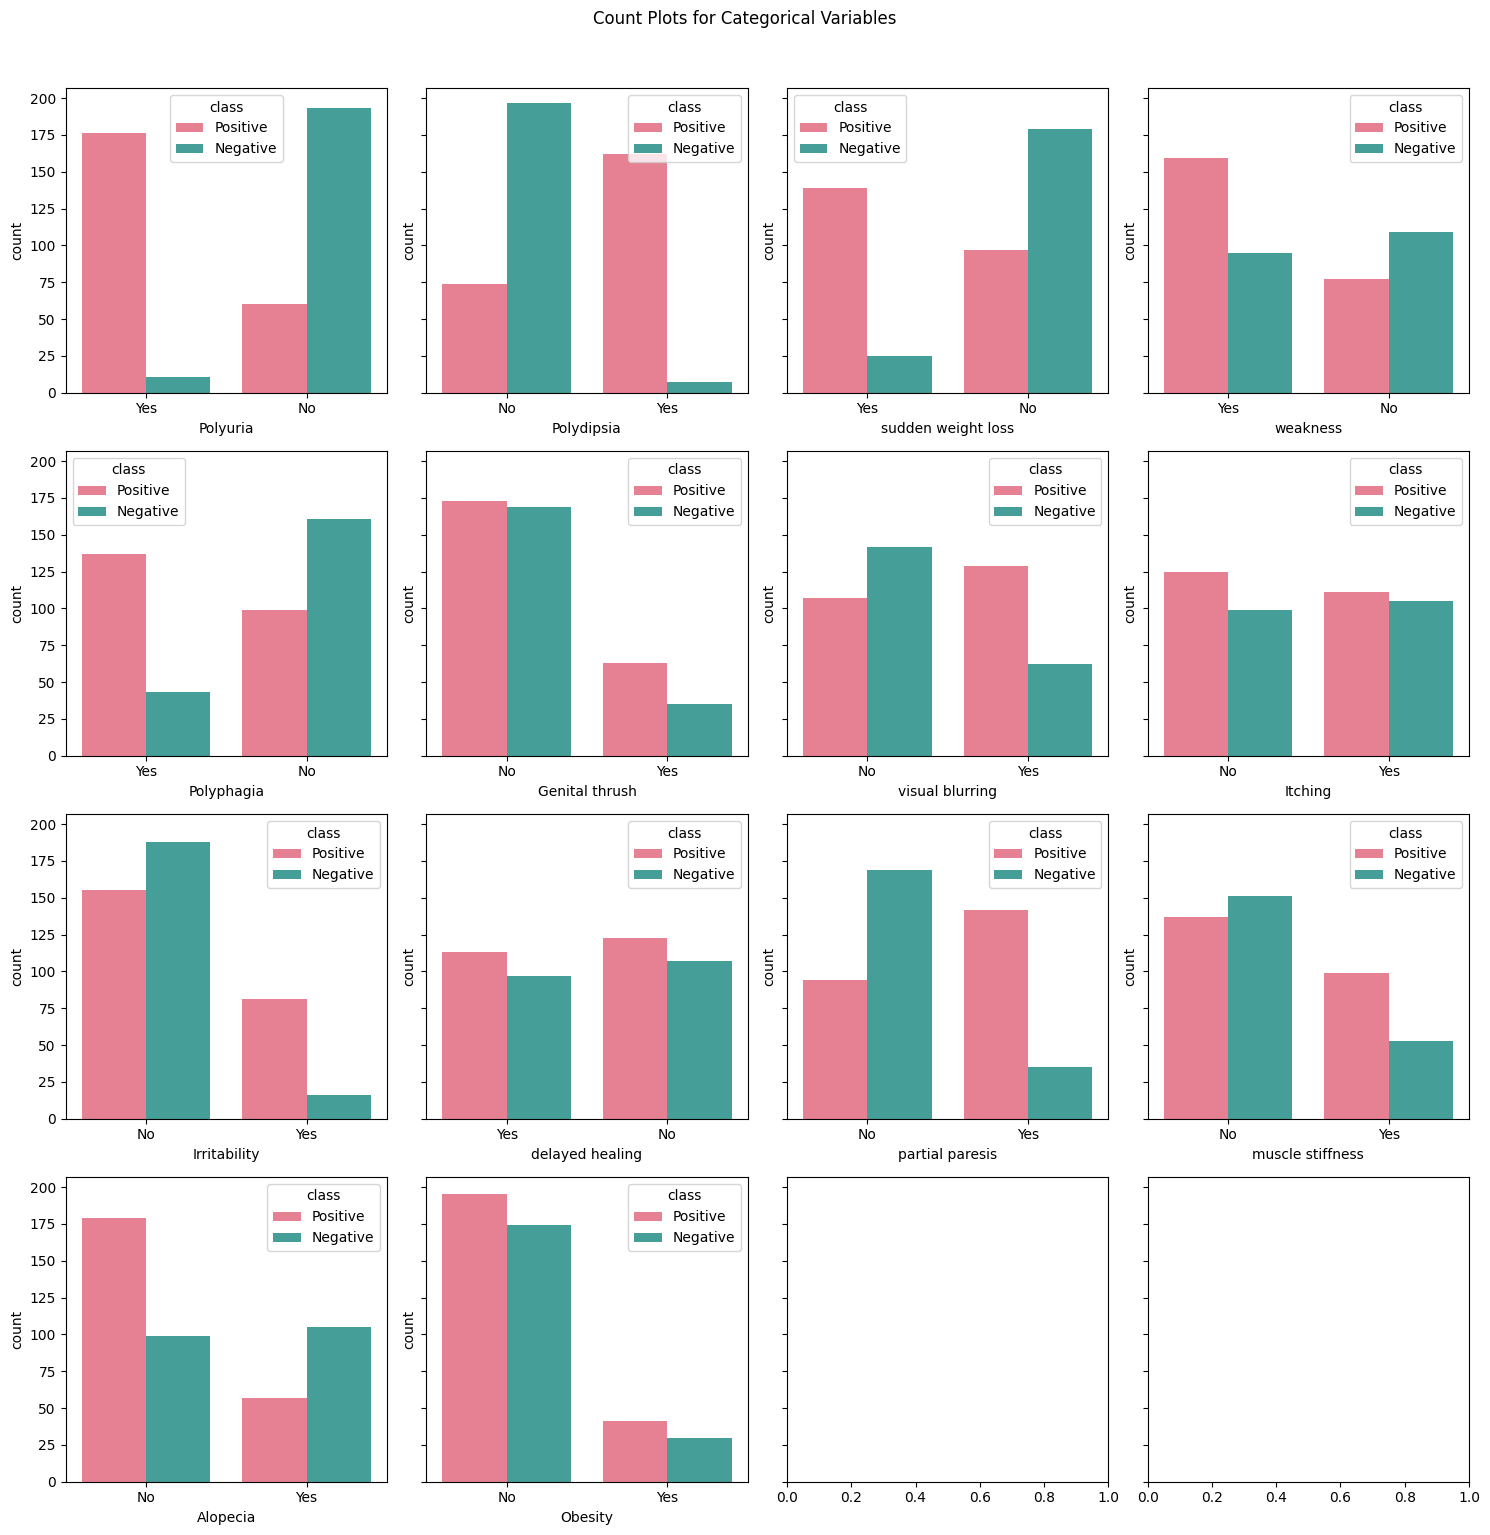

In [12]:
sns.pairplot(df, hue='class', palette='husl', markers=['o', 's'], height=2.5)
plt.suptitle('Pair Plot for Numerical Variables', y=1.02)
plt.show()

fig, axes = plt.subplots(4, 4, figsize=(15, 15), sharey=True)
fig.suptitle('Count Plots for Categorical Variables', y=1.02)

categorical_columns = df.columns[2 : -1]

for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, hue='class', data=df, palette='husl', ax=axes[i // 4, i % 4])

plt.tight_layout()
plt.show()

In [13]:
# Check for missing values
print('Check for missing values:\n\n',df.isnull().sum())
# Fill missing values with a specific value
df_filled = df.fillna(11)
print('\n\nFill missing values:\n\n')
df_filled.head(10)


Check for missing values:

 Age                   1
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64


Fill missing values:




,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,30.0,Female,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes,No,No,No,No,Positive
1,53.0,Female,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Positive
2,50.0,Female,Yes,Yes,Yes,No,Yes,No,No,No,No,Yes,Yes,No,No,No,Positive
3,40.0,Female,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive
4,35.0,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,No,No,Positive
5,40.0,Female,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Positive
6,48.0,Female,No,No,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
7,11.0,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Positive
8,60.0,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,Yes,No,No,Positive
9,35.0,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,Positive


In [14]:
#Method provides a concise summary of a DataFrame
df.info()
#The DataFrame has 440 entries (rows) and 17 columns.
#provide data types, non-null values, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 439 non-null    float64
 1   Gender              440 non-null    object 
 2   Polyuria            440 non-null    object 
 3   Polydipsia          440 non-null    object 
 4   sudden weight loss  440 non-null    object 
 5   weakness            440 non-null    object 
 6   Polyphagia          440 non-null    object 
 7   Genital thrush      440 non-null    object 
 8   visual blurring     440 non-null    object 
 9   Itching             440 non-null    object 
 10  Irritability        440 non-null    object 
 11  delayed healing     440 non-null    object 
 12  partial paresis     440 non-null    object 
 13  muscle stiffness    440 non-null    object 
 14  Alopecia            440 non-null    object 
 15  Obesity             440 non-null    object 
 16  class   

In [15]:
#Data Binning on the age column making it age groups and deleting ages as it is replaced with age groups

bins = [10, 20, 30, 40, 50, 60, 70, 80]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
print('Data Binning:')
df.head()

Data Binning:


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Age_Group
0,30.0,Female,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes,No,No,No,No,Positive,30-39
1,53.0,Female,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Positive,50-59
2,50.0,Female,Yes,Yes,Yes,No,Yes,No,No,No,No,Yes,Yes,No,No,No,Positive,50-59
3,40.0,Female,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive,40-49
4,35.0,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,No,No,Positive,30-39


In [16]:
# Selects data by index location.
df = df.iloc[: , 1:]
df.head()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Age_Group
0,Female,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes,No,No,No,No,Positive,30-39
1,Female,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Positive,50-59
2,Female,Yes,Yes,Yes,No,Yes,No,No,No,No,Yes,Yes,No,No,No,Positive,50-59
3,Female,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive,40-49
4,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,No,No,Positive,30-39


In [17]:
# splitting data and preparing it and apply label encoding
lb = LabelEncoder()
for col in df.columns:
    df[col] = lb.fit_transform(df[col])

df

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Age_Group
0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0,1,2
1,0,0,1,1,0,1,1,1,1,1,1,0,1,0,0,1,4
2,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,1,4
3,0,0,1,0,1,1,0,1,1,1,1,1,1,0,0,1,3
4,0,1,1,1,1,1,0,0,1,0,1,1,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
436,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
437,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,3
438,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [18]:
#Data analysis
df.describe()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Age_Group
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.500000,0.425000,0.384091,0.372727,0.577273,0.409091,0.222727,0.434091,0.490909,0.220455,0.477273,0.402273,0.345455,0.368182,0.161364,0.536364,3.227273
std,0.500569,0.494906,0.486933,0.484081,0.494555,0.492226,0.416550,0.496201,0.500486,0.415025,0.500052,0.490915,0.476058,0.482860,0.368285,0.499244,1.295931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [19]:
# Calculate specific statistics
print("\nMinimum values:\n")
print(df_filled.min())

print("\nMaximum values:\n")
print(df_filled.max())

print("\nMean values:\n")
print(df_filled.mean())

print("\nVariance values:\n")
print(df_filled.var())

print("\nStandard Deviation values:\n")
print(df_filled.std())

print("\nSkewness values:\n")
print(df_filled.skew())

print("\nKurtosis values:\n")
print(df_filled.kurt())


Minimum values:

Age                       11.0
Gender                  Female
Polyuria                    No
Polydipsia                  No
sudden weight loss          No
weakness                    No
Polyphagia                  No
Genital thrush              No
visual blurring             No
Itching                     No
Irritability                No
delayed healing             No
partial paresis             No
muscle stiffness            No
Alopecia                    No
Obesity                     No
class                 Negative
dtype: object

Maximum values:

Age                       90.0
Gender                    Male
Polyuria                   Yes
Polydipsia                 Yes
sudden weight loss         Yes
weakness                   Yes
Polyphagia                 Yes
Genital thrush             Yes
visual blurring            Yes
Itching                    Yes
Irritability               Yes
delayed healing            Yes
partial paresis            Yes
muscle stiffness    

<ipython-input-19-14d2b53d6ab6>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_filled.mean())
<ipython-input-19-14d2b53d6ab6>:12: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_filled.var())
<ipython-input-19-14d2b53d6ab6>:15: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_fille

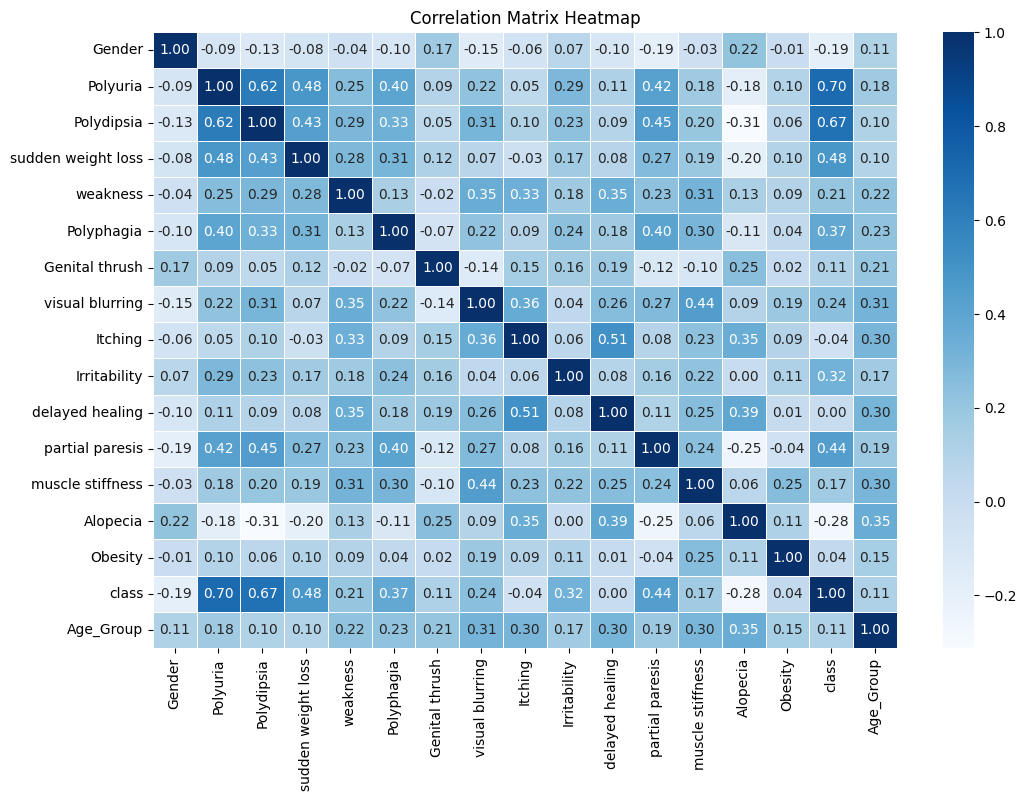

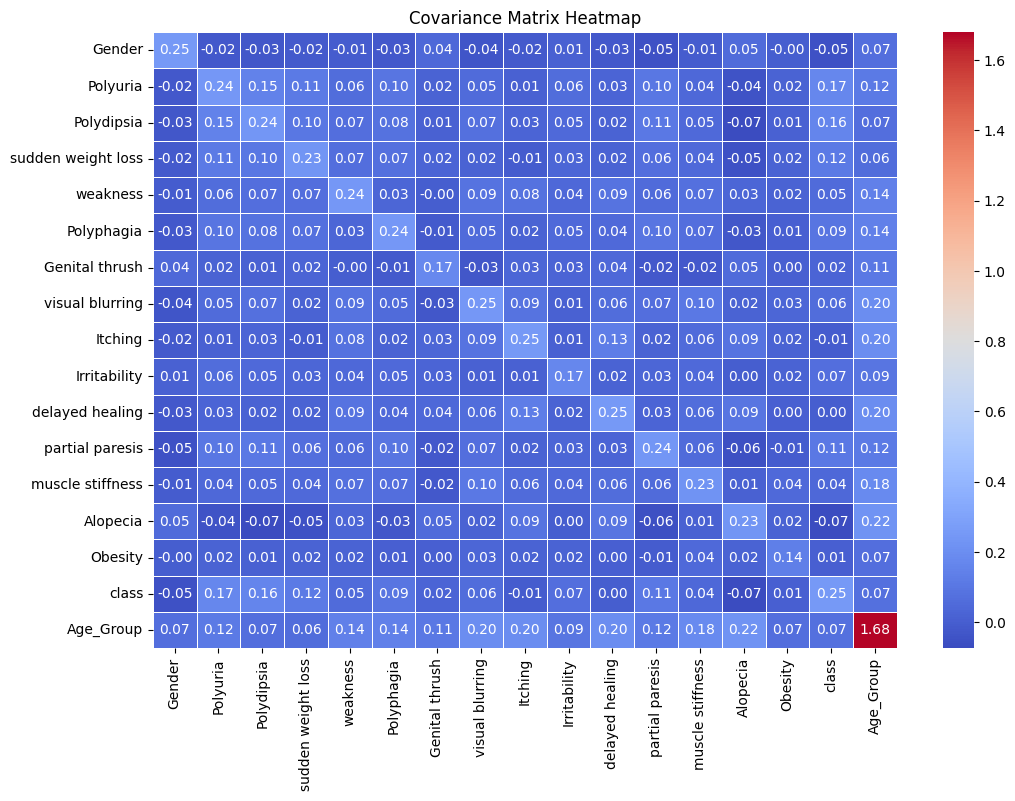

In [20]:
# Calculate Covariance Matrix
covariance_matrix = df.cov()

# Calculate Correlation Matrix
correlation_matrix = df.corr()

# Heatmap for Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Covariance Matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Covariance Matrix Heatmap")
plt.show()

In [21]:
# making a chi-square and getting creamer's v
#(creamer's v):an effect size measurement for the chi-square test of independence
#measure the association between the 'Gender' variable and a combination of 'weakness' and 'Age_Group' variables
contingency_table = pd.crosstab(df['Gender'], [df['weakness'], df['Age_Group']], margins=True)

# Calculate Cramer's V
chi2, _, _, _ = chi2_contingency(contingency_table)
n = df.shape[0]
num_categories = contingency_table.shape[1] - 1  # Subtract 1 for the margin
cramer_v = np.sqrt(chi2 / (n * (num_categories - 1)))
print("Cramer's V:", cramer_v)

Cramer's V: 0.08273095138603606


##LDA :
Is a supervised dimensionality reduction and classification technique widely used in machine learning and statistics. Takes into account the class labels of the data points to find the linear combinations of features that best separate different classes.

**bold text**

In [22]:
# Feature reduction algorithms
#LDA
def LDA_feature_reduction(X_train , X_test  ,y_train, n = 1):
    # Create a StandardScaler object
    scaler = StandardScaler()
    # Fit and transform the training data
    X_train_scaled = scaler.fit_transform(X_train)
    # Transform the test data using the parameters learned from the training data
    X_test_scaled = scaler.transform(X_test)

    # Create an LDA object
    lda = LinearDiscriminantAnalysis(n_components=n)
    # Fit the LDA model to the standard training data and transform it
    X_train_lda = lda.fit_transform(X_train_scaled, y_train)
    # Transform the standard test data to the reduced feature space
    X_test_lda = lda.transform(X_test_scaled)

##PCA:
Unsupervised Method. Its primary goal is to transform a high-dimensional dataset into a lower-dimensional space while retaining as much of the original variance as possible

In [23]:
#PCA
def PCA_feature_reduction(X_train , X_test , n = 3):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    return X_train_pca , X_test_pca

In [25]:
#t-test
# Extract the 'class' variable for people with diabetes
pepole_has_diabetes = df[df['class'] == 1]['class']

# Perform a one-sample t-test
t_stat, p_value = stats.ttest_1samp(pepole_has_diabetes, popmean=42)

alpha = 0.05
# Check the p-value against the significance level
if p_value < alpha:
    print("The null hypothesis can be rejected. There is a significant difference.")
else:
    print("The null hypothesis cannot be rejected. There is no significant difference.")

The null hypothesis can be rejected. There is a significant difference.


In [26]:
#ANOVA
#Perform one-way ANOVA
f_statistic, p_value = f_oneway(df['Gender'], df['class'])
# Display F-statistic and p-value using an f-string
f"F-statistic: {f_statistic}, p-value: {p_value}"
# Display ANOVA results
print(f"ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")
# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

ANOVA Results:
F-statistic: 1.1640702684786206
P-value: 0.2809193066857652
Fail to reject the null hypothesis


In [27]:
X = df[df.columns.drop("class")]  # Selects all columns from the DataFrame except the "class"
y = df["class"]                   # Selects the "class" column as the target

#Splits the dataset into training and testing sets
#20% of the data should be used for testing and 80% will be used for training.
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.2)


In [28]:
from sklearn.metrics import roc_curve, auc
#from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

def get_accuracies(y_pred, y_test):
    # Calculate and display accuracy
    accuracy = accuracy_score(y_pred, y_test)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Display classification report
    print(classification_report(y_pred, y_test))

    # Display confusion matrix heatmap
    cm = confusion_matrix(y_pred, y_test)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Determine if the model is overfitting or underfitting
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])

    if precision == 1.0 and recall == 1.0:
        print("\nThe model may be overfitting to the training data.")
    elif precision == recall == 0.5:
        print("\nThe model may be underfitting or providing random predictions.")
    else:
        print("\nThe model performance seems balanced.\n")


    #ROC(Receiver Operating Characteristic):is a graphical representation of the performance
    #of a binary classification model at various classification thresholds.
    #It illustrates the trade-off between sensitivity (true positive rate) and
    #specificity (true negative rate) for different threshold values.

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()



Accuracy: 89.77%
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.91      0.90      0.91        48

    accuracy                           0.90        88
   macro avg       0.90      0.90      0.90        88
weighted avg       0.90      0.90      0.90        88



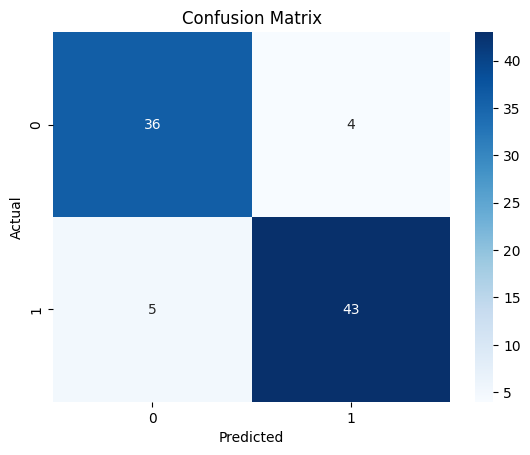


The model performance seems balanced.



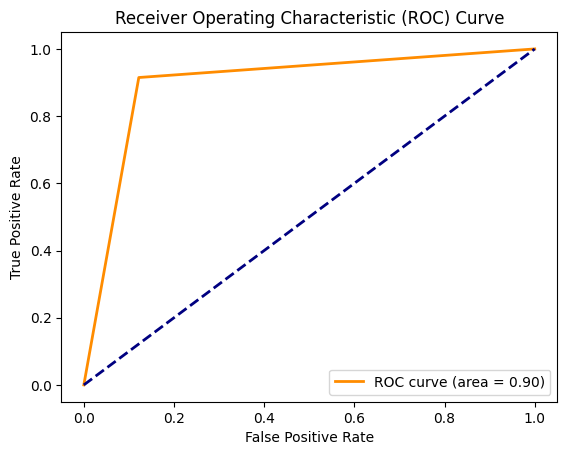

In [29]:
# Naive bayes
# Create and fit Gaussian Naive Bayes model
nb = GaussianNB()
nb.fit(X_train , y_train)

# Make predictions on the test set
y_pred = nb.predict(X_test)

# Evaluate the model using the get_accuracies function
get_accuracies(y_pred , y_test)

In [30]:
#Bayesian Network:analysis is useful for probabilistic reasoning and predictions in the context of the defined Bayesian Network structure.
#Estimates the CPDs using Maximum Likelihood Estimation,
#performs inference using Variable Elimination
#This type of analysis is useful for probabilistic reasoning and predictions in the context of the defined Bayesian Network structure.

# Sample data
data = pd.DataFrame(data={'Gender': [1, 1, 0, 0, 1, 1, 0, 0],
                          'Obesity': [1, 0, 1, 0, 1, 1, 0, 0],
                          'class': [1, 1, 1, 0, 1, 1, 0, 0]})

# Define the structure of the Bayesian Network
model = BayesianNetwork([('Gender', 'Obesity'), ('Obesity', 'class')])

# Estimate CPDs (Conditional Probability Distributions)
model.fit(data, estimator=MaximumLikelihoodEstimator)

# Perform inference
inference = VariableElimination(model)
result = inference.query(variables=['class'], evidence={'Gender': 0, 'Obesity': 1})

# Display the results
print(result)

+----------+--------------+
| class    |   phi(class) |
+==========+==============+
| class(0) |       0.0000 |
+----------+--------------+
| class(1) |       1.0000 |
+----------+--------------+


Accuracy: 96.59%
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.96      0.98      0.97        46

    accuracy                           0.97        88
   macro avg       0.97      0.97      0.97        88
weighted avg       0.97      0.97      0.97        88



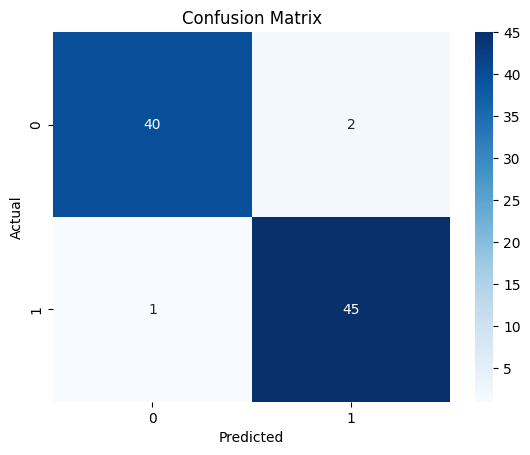


The model performance seems balanced.



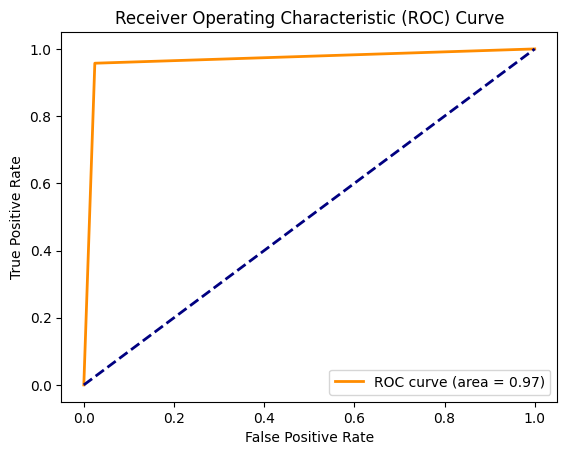

In [31]:
#Descision tree model
# Create a Decision Tree classifier with entropy as the criterion
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train (fit) the Decision Tree model using the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Calculate the entropy of the root node of the Decision Tree
tree_entropy = dt_model.tree_.impurity[0]

# Call the get_accuracies function to print the accuracy of the predictions
get_accuracies(y_pred , y_test)



In [32]:
#Linear Discriminant Analysis (LDA) evaluate performance of model.

# Create an instance of LDA
lda_model = LinearDiscriminantAnalysis()

# Define the number of folds for k-fold cross-validation
k_folds = 5

# Create a k-fold cross-validator
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get accuracy scores
accuracy_scores = cross_val_score(lda_model, X, y, cv=kf, scoring='accuracy')

# Calculate the average accuracy across all folds
average_accuracy = np.mean(accuracy_scores)

# Print the average accuracy
print(f'Average Accuracy: {average_accuracy:.2%}')


Average Accuracy: 87.27%


Accuracy: 96.59%
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        44
           1       0.94      1.00      0.97        44

    accuracy                           0.97        88
   macro avg       0.97      0.97      0.97        88
weighted avg       0.97      0.97      0.97        88



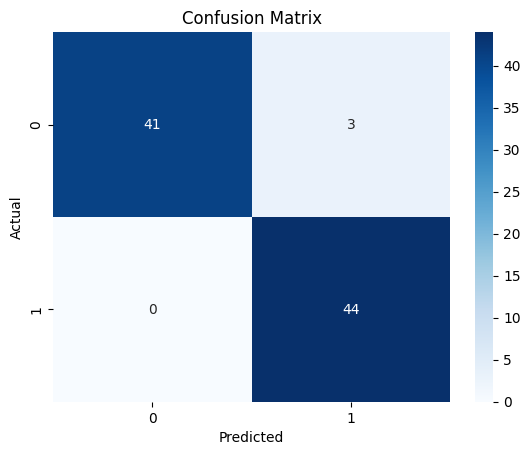


The model performance seems balanced.



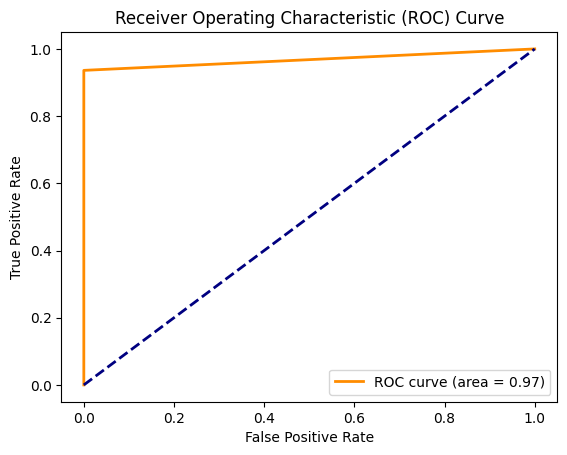

In [33]:
# Apply PCA feature reduction
X_train_pca , X_test_pca = PCA_feature_reduction(X_train , X_test)

# Train (fit) the Decision Tree model using the reduced feature sets
dt_model.fit(X_train_pca, y_train)

# Make predictions on the test set with reduced features
y_pred = dt_model.predict(X_test_pca)

# Call the get_accuracies function to print the accuracy of the predictions
get_accuracies(y_pred , y_test)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


the accuracy of n = 1 : 
Accuracy: 96.59%
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        44
           1       0.94      1.00      0.97        44

    accuracy                           0.97        88
   macro avg       0.97      0.97      0.97        88
weighted avg       0.97      0.97      0.97        88



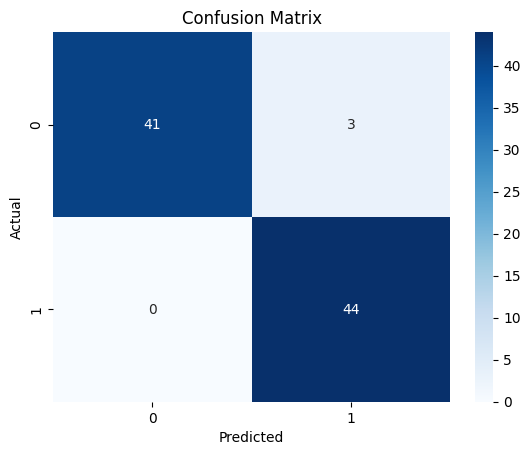


The model performance seems balanced.



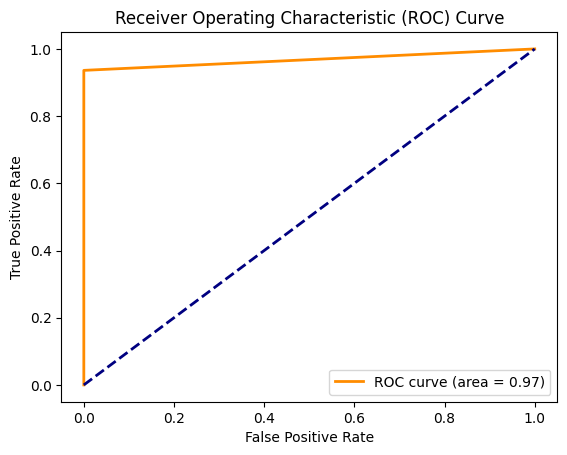

None
the accuracy of n = 3 : 
Accuracy: 90.91%
              precision    recall  f1-score   support

           0       0.95      0.87      0.91        45
           1       0.87      0.95      0.91        43

    accuracy                           0.91        88
   macro avg       0.91      0.91      0.91        88
weighted avg       0.91      0.91      0.91        88



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


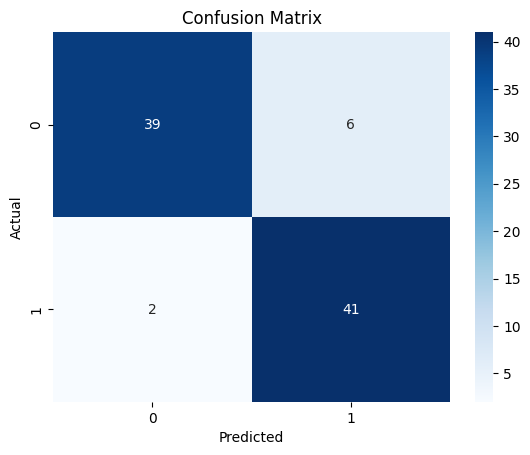


The model performance seems balanced.



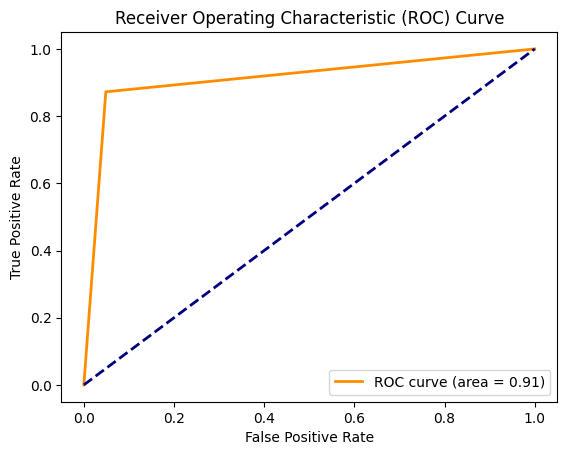

None
the accuracy of n = 5 : 
Accuracy: 88.64%
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        41
           1       0.89      0.89      0.89        47

    accuracy                           0.89        88
   macro avg       0.89      0.89      0.89        88
weighted avg       0.89      0.89      0.89        88



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


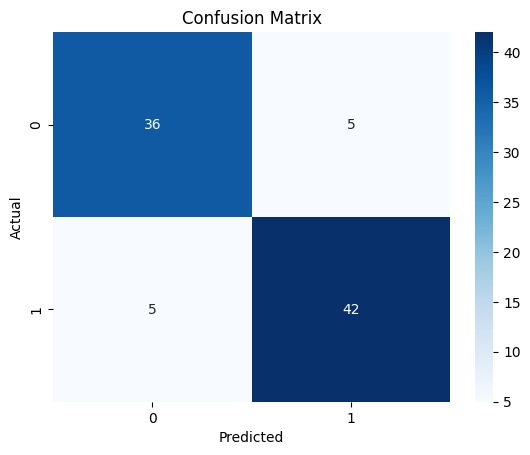


The model performance seems balanced.



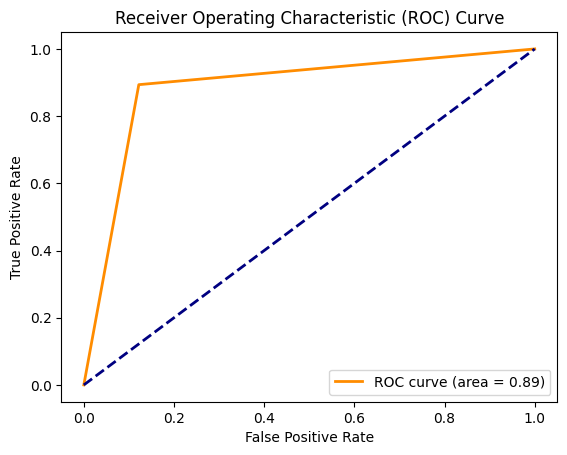

None
the accuracy of n = 7 : 
Accuracy: 93.18%
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.91      0.96      0.93        45

    accuracy                           0.93        88
   macro avg       0.93      0.93      0.93        88
weighted avg       0.93      0.93      0.93        88



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


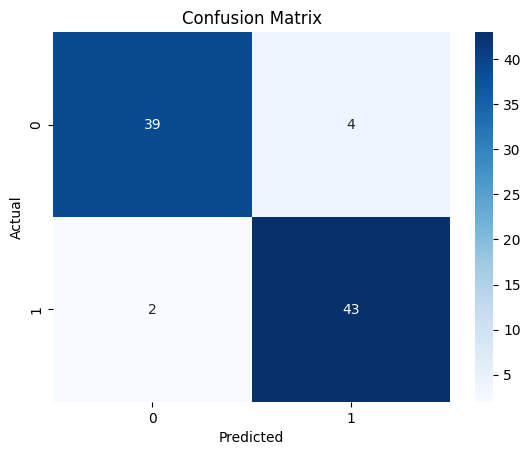


The model performance seems balanced.



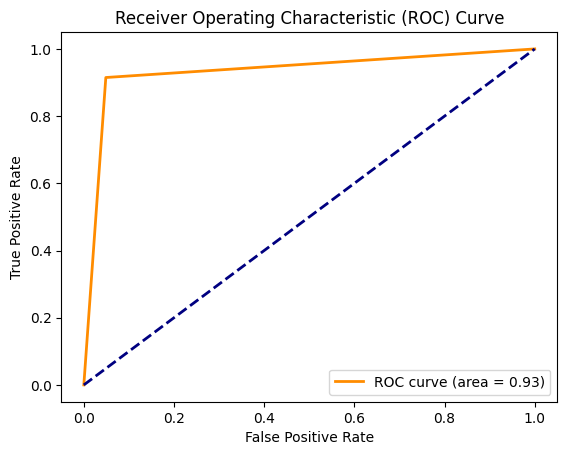

None
the accuracy of n = 9 : 
Accuracy: 90.91%
              precision    recall  f1-score   support

           0       0.95      0.87      0.91        45
           1       0.87      0.95      0.91        43

    accuracy                           0.91        88
   macro avg       0.91      0.91      0.91        88
weighted avg       0.91      0.91      0.91        88



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


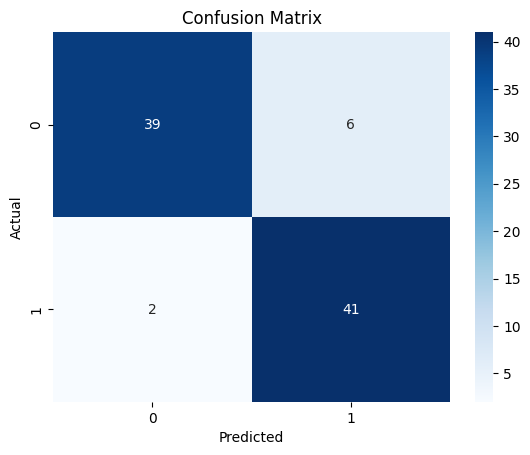


The model performance seems balanced.



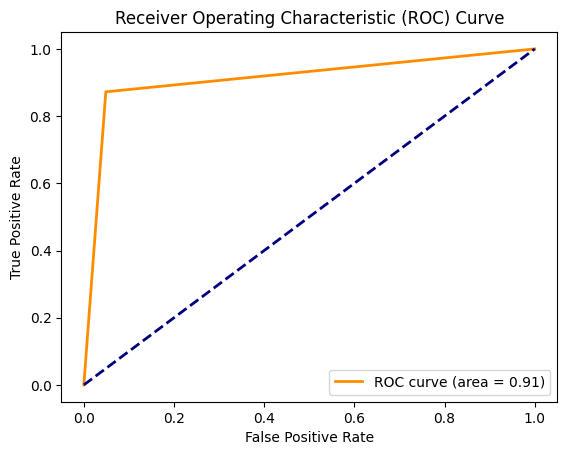

None


In [34]:
#k-Nearest Neighbors (KNN)
#This can help in selecting the optimal value of n_neighbors for your specific dataset.

neighbor_values = [1, 3, 5, 7, 9] #evaluating the accuracy for each value

for n_neighbors in neighbor_values:
    # Create a KNeighborsClassifier model with the current value of n_neighbors
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    # Train (fit) the KNN model using the training data
    knn_model.fit(X_train, y_train)
    # Use the trained model to make predictions on the test set
    y_pred = knn_model.predict(np.ascontiguousarray(X_test))

    # Evaluate the model and store accuracy in the dictionary
    print(f'the accuracy of n = {n_neighbors} : ')
    print(get_accuracies(y_pred , y_test))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy: 96.59%
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        44
           1       0.94      1.00      0.97        44

    accuracy                           0.97        88
   macro avg       0.97      0.97      0.97        88
weighted avg       0.97      0.97      0.97        88



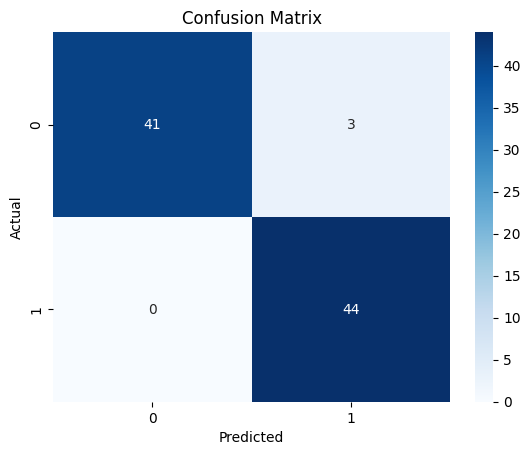


The model performance seems balanced.



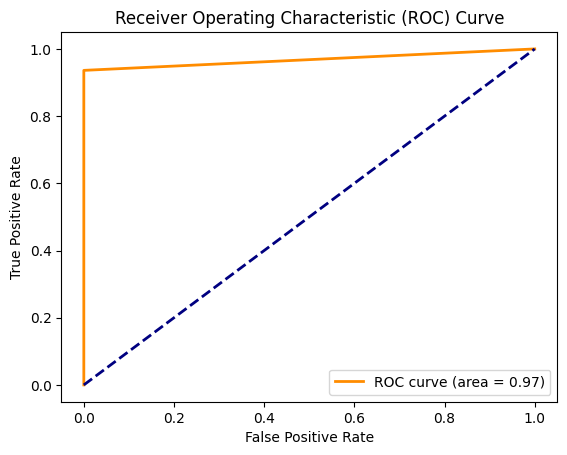

In [35]:
#k-Nearest Neighbors (KNN) classification with a single neighbor
knn_model = KNeighborsClassifier(n_neighbors=1) # 1 due to the previous tuning test
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(np.ascontiguousarray(X_test))

get_accuracies(y_pred , y_test)

#SVD

In [36]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

def SVD_feature_reduction(X_train, X_test, n=None):
    # Create a StandardScaler object
    scaler = StandardScaler()

    # Fit and transform the training data
    X_train_scaled = scaler.fit_transform(X_train)

    # Transform the test data using the parameters learned from the training data
    X_test_scaled = scaler.transform(X_test)

    # Determine the number of components if not specified
    if n is None:
        n = min(X_train_scaled.shape[0], X_train_scaled.shape[1])

    # Create a TruncatedSVD object
    svd = TruncatedSVD(n_components=n)

    # Fit the SVD model to the standard training data and transform it
    X_train_svd = svd.fit_transform(X_train_scaled)

    # Transform the standard test data to the reduced feature space
    X_test_svd = svd.transform(X_test_scaled)

    return X_train_svd, X_test_svd


Accuracy: 96.59%
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        41
           1       1.00      0.94      0.97        47

    accuracy                           0.97        88
   macro avg       0.97      0.97      0.97        88
weighted avg       0.97      0.97      0.97        88



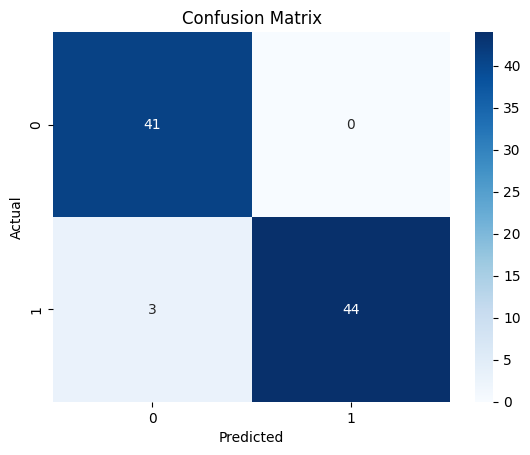


The model performance seems balanced.



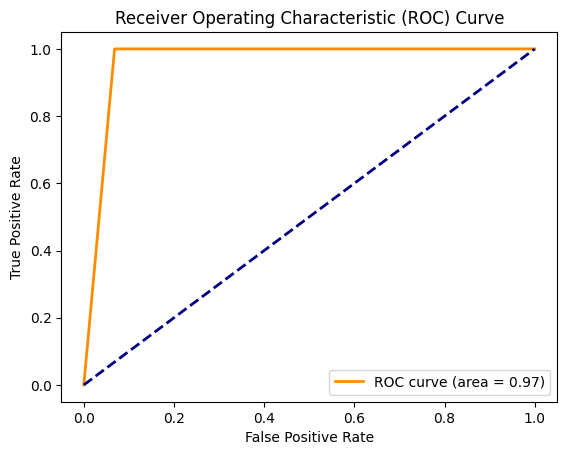

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Apply SVD feature reduction
X_train_svd, X_test_svd = SVD_feature_reduction(X_train, X_test)

# Train (fit) the Decision Tree model using the reduced feature sets
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_svd, y_train)

# Make predictions on the test set with reduced features
y_pred_svd = dt_model.predict(X_test_svd)

# Calculate the accuracy of the predictions
accuracy_svd = accuracy_score(y_test, y_pred_svd)
get_accuracies(y_test , y_pred_svd)

#Neural Network

Accuracy: 96.59%
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        41
           1       0.98      0.96      0.97        47

    accuracy                           0.97        88
   macro avg       0.97      0.97      0.97        88
weighted avg       0.97      0.97      0.97        88



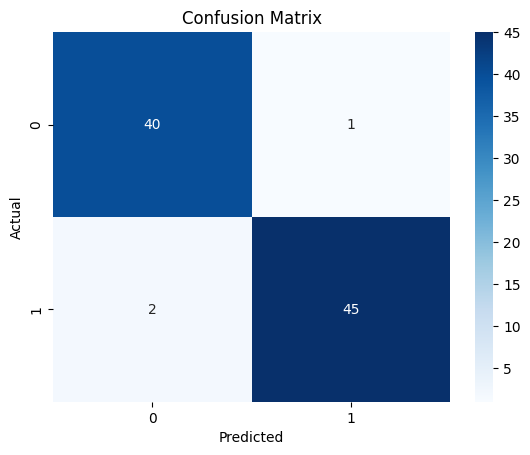


The model performance seems balanced.



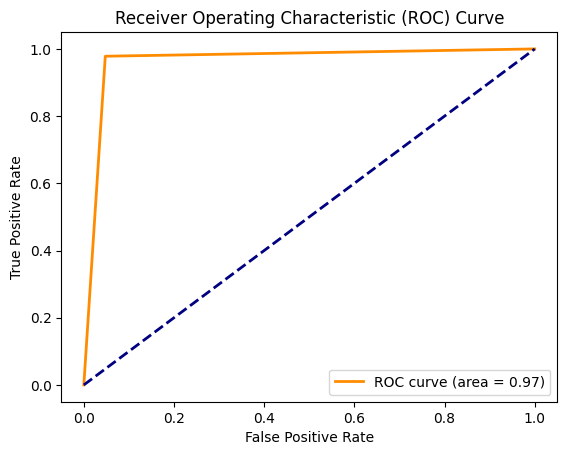

In [39]:
from sklearn.neural_network import MLPClassifier

# Create an MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)

# Train (fit) the MLP model using the reduced feature sets
mlp_model.fit(X_train_svd, y_train)

# Make predictions on the test set with reduced features
y_pred_mlp = mlp_model.predict(X_test_svd)

# Calculate the accuracy of the predictions
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
get_accuracies(y_test , y_pred_mlp)

## Comparisons

https://www.kaggle.com/code/hknaralasetty/diabetes-dataset-eda-prediction-97 -> worked with th same dataset got 97% acuraccy using random forset classifier made a good eda

https://www.kaggle.com/code/mamaliesmaeili/diabetes-prediction-99-accuracy/notebook->> 99% accuracy used a randomized search cross validation on random forest model with good eda and visualization


## Refrences

Dataset on Kaggle : https://www.kaggle.com/datasets/tanshihjen/early-stage-diabetes-risk-prediction/data